In [822]:
path='D:/Project Data/DataHack Part2 gem/'
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn import cross_validation
from scipy import stats
from math import fabs
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor 
import statsmodels.api as sm
from sklearn.cross_validation import *
from math import *
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn import svm

In [823]:
train=pd.read_csv(path+'train.csv')
test=pd.read_csv(path+'test.csv')
train['std']=stats.zscore(train['shares'])
train=train[train['std']< 3]

train.shape

(24688, 49)

In [824]:

Category_article=train['Category_article'].unique()
repl_Category_article= np.arange(1,len(Category_article)+1)
table_Category_article = pd.DataFrame({'Category_article':Category_article,'repl_Category_article':repl_Category_article})

Day_of_publishing=train['Day_of_publishing'].unique()
repl_Day_of_publishing= np.arange(1,len(Day_of_publishing)+1)
table_Day_of_publishing = pd.DataFrame({'Day_of_publishing':Day_of_publishing,'rep1_Day_of_publishing':repl_Day_of_publishing})

traindata=pd.merge(pd.merge(train,table_Category_article),table_Day_of_publishing)
del traindata['Day_of_publishing']
del traindata['Category_article']
del traindata['std']

In [825]:
traindata.shape

(24688, 48)

In [826]:
traindata.columns

Index(['id', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares', 'repl_Category_article', 'rep1_Day_of_publishing'], dtype='object')

In [827]:
train_data=traindata[['kw_avg_avg','LDA_03','LDA_01','kw_max_avg','num_imgs','kw_min_avg','num_hrefs',
                      'kw_avg_max','self_reference_avg_sharess','global_subjectivity','self_reference_min_shares',
                      'self_reference_max_shares','average_token_length','self_reference_max_shares','title_subjectivity',
                      'abs_title_sentiment_polarity','num_keywords','repl_Category_article','num_videos',
                      'rep1_Day_of_publishing','avg_negative_polarity','title_sentiment_polarity','avg_positive_polarity',
                      'LDA_00','kw_avg_min','rate_negative_words','num_self_hrefs','avg_positive_polarity']]
target_data=traindata['shares']

In [828]:
robo=sm.RLM(target_data,train_data,M=sm.robust.norms.LeastSquares())
rlm_results = robo.fit()
rlm_results.params

kw_avg_avg                         1.195322
LDA_03                            12.561608
LDA_01                          -513.610771
kw_max_avg                        -0.144464
num_imgs                          16.471593
kw_min_avg                        -0.217275
num_hrefs                         16.356331
kw_avg_max                        -0.001300
self_reference_avg_sharess         0.001171
global_subjectivity             1725.406631
self_reference_min_shares          0.006559
self_reference_max_shares         -0.000061
average_token_length            -162.955944
self_reference_max_shares         -0.000061
title_subjectivity               250.610434
abs_title_sentiment_polarity    -243.929669
num_keywords                      43.607701
repl_Category_article            -69.462147
num_videos                         7.810552
rep1_Day_of_publishing            73.042999
avg_negative_polarity           -357.871081
title_sentiment_polarity         293.004987
avg_positive_polarity           

In [829]:
predictions=rlm_results.predict(train_data)

In [830]:
'''predictions = lr.predict(train_data)
prediction=[]
for i in range(0,len(predictions)):
    z=predictions[i][0]
    prediction.append(z)'''


'predictions = lr.predict(train_data)\nprediction=[]\nfor i in range(0,len(predictions)):\n    z=predictions[i][0]\n    prediction.append(z)'

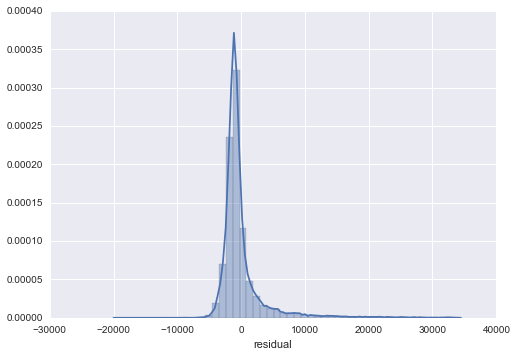

In [831]:
sub=pd.DataFrame({'AaSno':np.arange(1,len(predictions)+1),'Actual':target_data,'predicted':predictions})
sub['residual']=sub['Actual']-sub['predicted']
sns.distplot( sub['residual'])

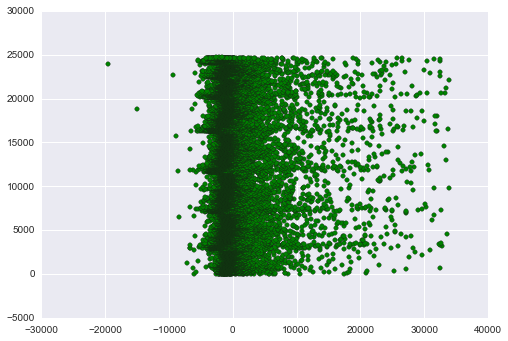

In [832]:
plt.scatter( sub['residual'],sub['AaSno'],c='green')

In [833]:
np.mean(sub['residual'])

12.394830862955926

((array([-4.02842499, -3.81478958, -3.69799538, ...,  3.69799538,
          3.81478958,  4.02842499]),
  array([-19487.32517875, -15044.56292217,  -9341.62288649, ...,
          33696.2853412 ,  33871.49114153,  33940.07639094])),
 (2980.9901251106826, 12.394830862957244, 0.76979820568914292))

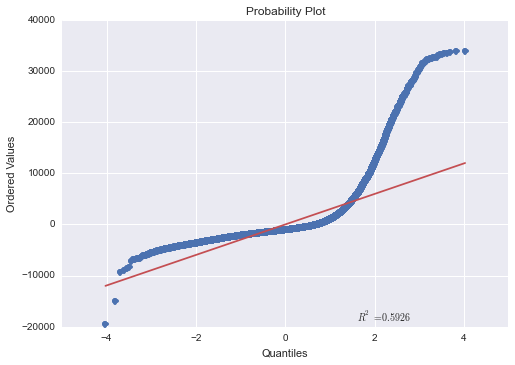

In [834]:
from scipy.stats import probplot
probplot(sub['residual'],plot=plt)

In [835]:
test=pd.merge(pd.merge(test,table_Category_article),table_Day_of_publishing)
del test['Day_of_publishing']
del test['Category_article']

In [836]:
testdata=test[['kw_avg_avg','LDA_03','LDA_01','kw_max_avg','num_imgs','kw_min_avg','num_hrefs',
                      'kw_avg_max','self_reference_avg_sharess','global_subjectivity','self_reference_min_shares',
                      'self_reference_max_shares','average_token_length','self_reference_max_shares','title_subjectivity',
                      'abs_title_sentiment_polarity','num_keywords','repl_Category_article','num_videos',
                      'rep1_Day_of_publishing','avg_negative_polarity','title_sentiment_polarity','avg_positive_polarity',
                      'LDA_00','kw_avg_min','rate_negative_words','num_self_hrefs','avg_positive_polarity']]


In [837]:
pred=rlm_results.predict(testdata)

In [838]:
'''predictiontest=[]
for i in range(0,len(pred)):
    z=pred[i][0]
    predictiontest.append(z)'''

'predictiontest=[]\nfor i in range(0,len(pred)):\n    z=pred[i][0]\n    predictiontest.append(z)'

In [839]:
Submission=pd.DataFrame({'id':test['id'],'predictions':pred})
Submission.to_csv(path+'Submission_rb2.csv',index=False)
len(np.unique(pred)),max(pred),min(pred)

(10089, 21699.000535081796, -295.95559416399954)